# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [220]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [95]:
# percent of missing values
df.isnull().sum()/len(df['Loan_ID'])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [109]:
# select records with missing credit history
credit_history_null = df.loc[df['Credit_History'].isnull()]
max_income = credit_history_null['ApplicantIncome'].max()
min_income = credit_history_null['ApplicantIncome'].min()
print(max_income)
print(min_income)
# check value count of property area
credit_history_null['Property_Area'].value_counts()


20833
416


Urban        20
Semiurban    16
Rural        14
Name: Property_Area, dtype: int64

In [108]:
# select records where self employed is yes and education is graduate and income is greater than 5000
self_employed = df.loc[(df['Self_Employed'] == 'Yes') & (df['Education'] == 'Graduate') & (df['ApplicantIncome'] > 5000)]
# check unique values of credit history
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Look at some basic statistics for numerical variables.

In [96]:
# statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
# Credit History
credit_history_count = df['Credit_History'].value_counts()
print(f"{credit_history_count[1]} people have credit history, {credit_history_count[0]} people don't have credit history")

475 people have credit history, 89 people don't have credit history


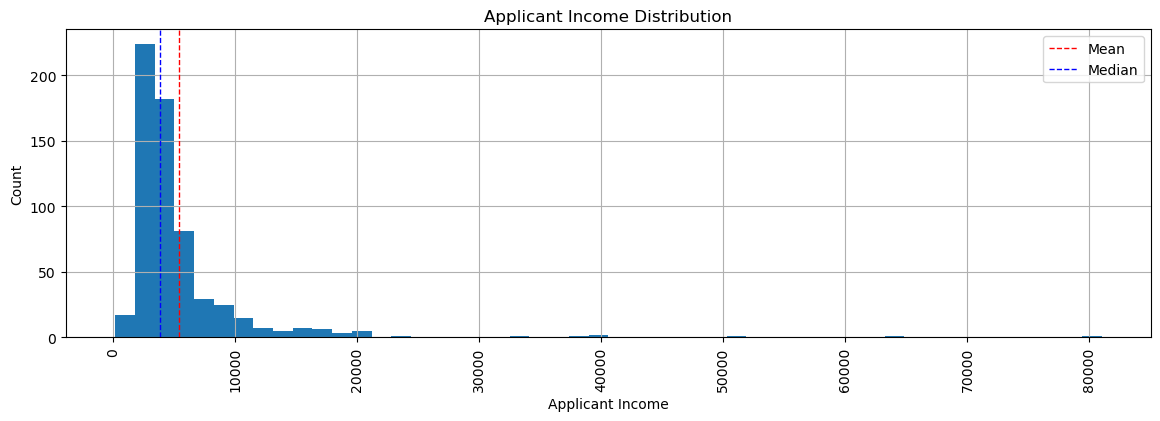

In [35]:
# Applicant Income
plt.figure(figsize=(14,4))
plt.xticks(rotation=90)
plt.title('Applicant Income Distribution')
df['ApplicantIncome'].hist(bins=50)
plt.xlabel('Applicant Income')
plt.ylabel('Count')
# put mean line
plt.axvline(df['ApplicantIncome'].mean(), color='r', linestyle='dashed', linewidth=1)
# put median line
plt.axvline(df['ApplicantIncome'].median(), color='b', linestyle='dashed', linewidth=1)
# legend
plt.legend({'Mean':df['ApplicantIncome'].mean(),'Median':df['ApplicantIncome'].median()})
plt.show()

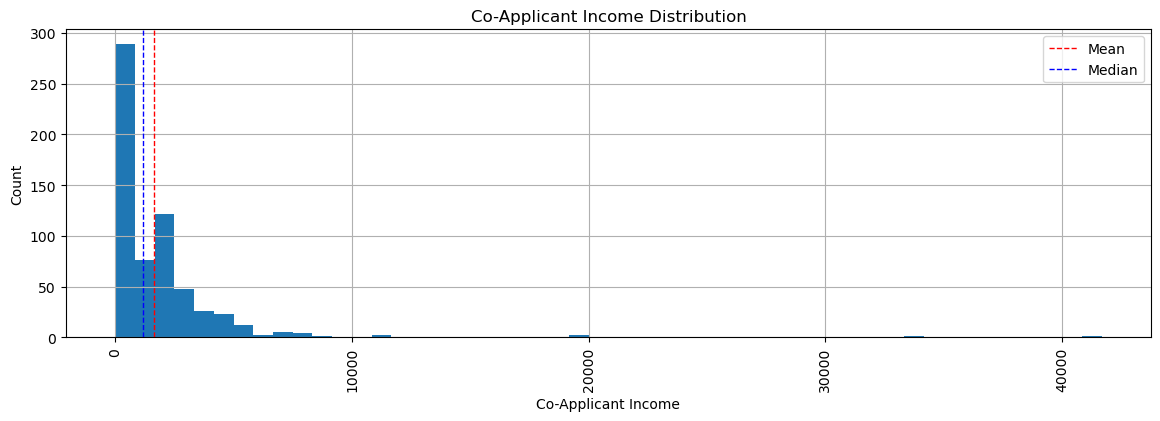

In [36]:
# Applicant Income
plt.figure(figsize=(14,4))
plt.xticks(rotation=90)
plt.title('Co-Applicant Income Distribution')
df['CoapplicantIncome'].hist(bins=50)
plt.xlabel('Co-Applicant Income')
plt.ylabel('Count')
# put mean line
plt.axvline(df['CoapplicantIncome'].mean(), color='r', linestyle='dashed', linewidth=1)
# put median line
plt.axvline(df['CoapplicantIncome'].median(), color='b', linestyle='dashed', linewidth=1)
# legend
plt.legend({'Mean':df['CoapplicantIncome'].mean(),'Median':df['CoapplicantIncome'].median()})
plt.show()

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [115]:
unique_gender = df['Gender'].value_counts()
unique_married = df['Married'].value_counts()
unique_education = df['Education'].value_counts()
unique_self_employed = df['Self_Employed'].value_counts()
unique_credit_history = df['Credit_History'].value_counts()
unique_property_area = df['Property_Area'].value_counts()
unique_loan_status = df['Loan_Status'].value_counts()

print(unique_gender)
print(unique_married)
print(unique_education)
print(unique_self_employed)
print(unique_credit_history)
print(unique_property_area)
print(unique_loan_status)

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

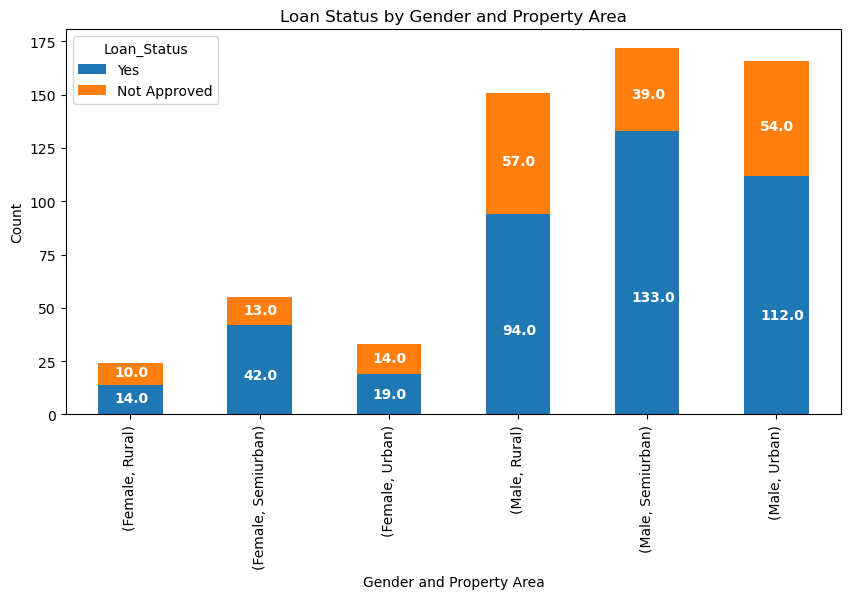

In [130]:
# gender, property area, loan status
counts = df.groupby(['Gender', 'Property_Area', 'Loan_Status']).size().unstack()

# set Loan_Status Y = Approved, N = Not Approved
counts['Yes'] = counts['Y']
counts['Not Approved'] = counts['N']
counts.drop(columns=['Y', 'N'], inplace=True)

# create a stacked bar plot
ax = counts.plot(kind='bar', stacked=True, figsize=(10,5))

# show count
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (p.get_x()+.25*width, p.get_y()+.4*height), color='white', weight='bold')

# Add labels and title
ax.set_xlabel('Gender and Property Area')
ax.set_ylabel('Count')
ax.set_title('Loan Status by Gender and Property Area')

# show plot
plt.show()

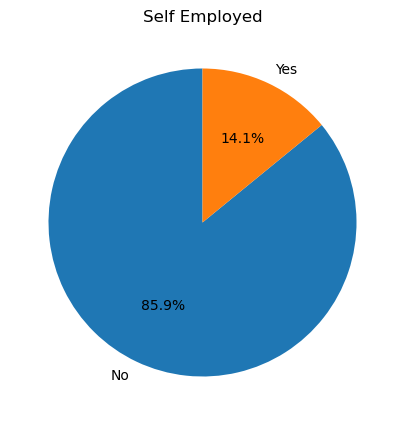

In [131]:
plt.figure(figsize=(10,5))
plt.title('Self Employed')
plt.pie(unique_self_employed, labels=unique_self_employed.index, autopct='%1.1f%%', startangle=90)
plt.show()

Heat Map

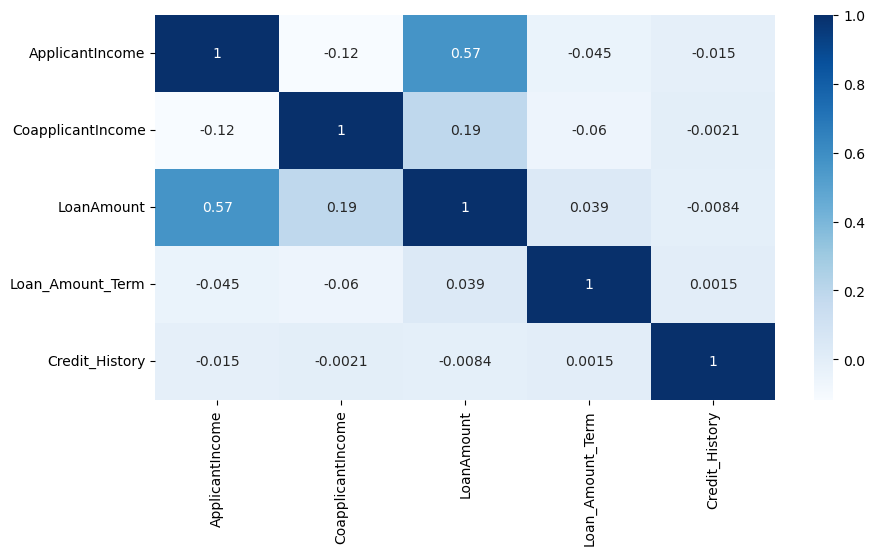

In [120]:
# Heat map
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



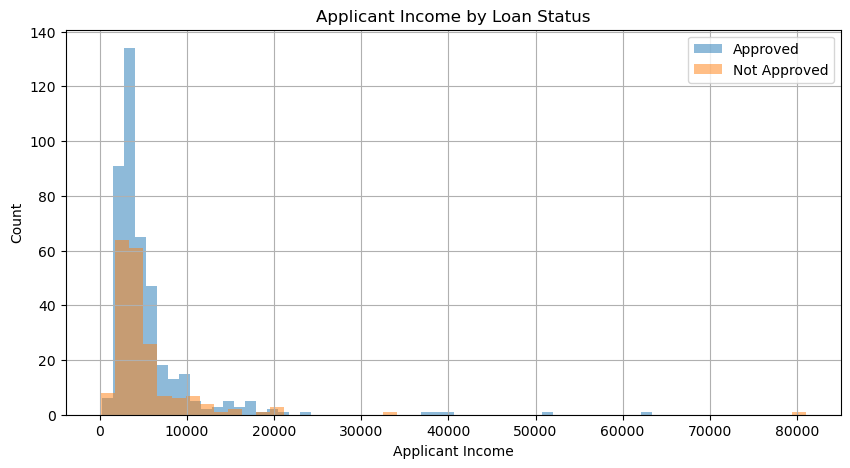

In [132]:
# histogram of Applicant Income by Loan Status
plt.figure(figsize=(10,5))
plt.title('Applicant Income by Loan Status')

# Approved
df.loc[df['Loan_Status'] == 'Y']['ApplicantIncome'].hist(bins=50, alpha=0.5, label='Approved')

# Not Approved
df.loc[df['Loan_Status'] == 'N']['ApplicantIncome'].hist(bins=50, alpha=0.5, label='Not Approved')

plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.legend()
plt.show()


Look at box plots to understand the distributions. 

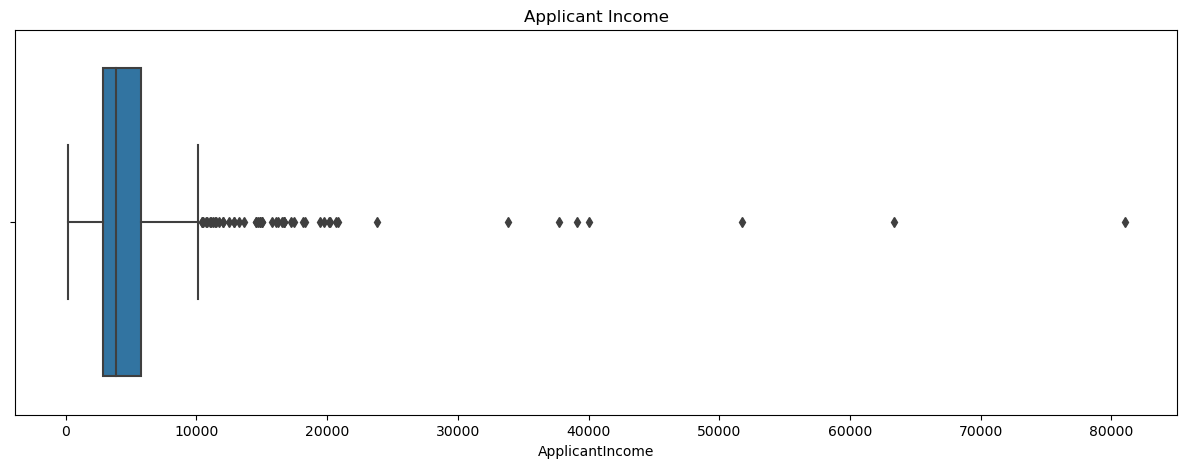

In [136]:
# box plot of Applicant Income
plt.figure(figsize=(15,5))
plt.title('Applicant Income')
sns.boxplot(x='ApplicantIncome', data=df)
plt.show()

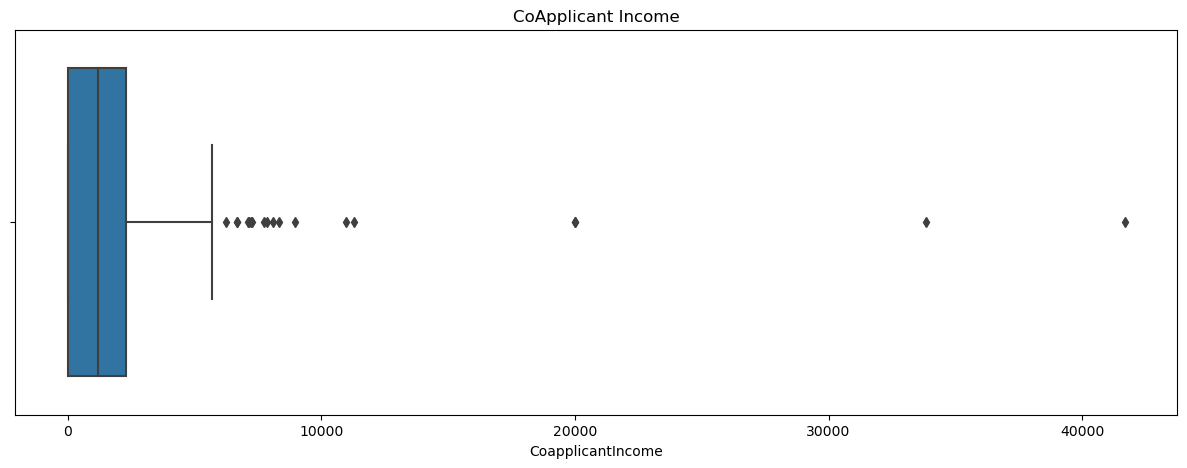

In [137]:
# box plot of CoApplicant Income
plt.figure(figsize=(15,5))
plt.title('CoApplicant Income')
sns.boxplot(x='CoapplicantIncome', data=df)
plt.show()

Look at the distribution of income segregated  by `Education`

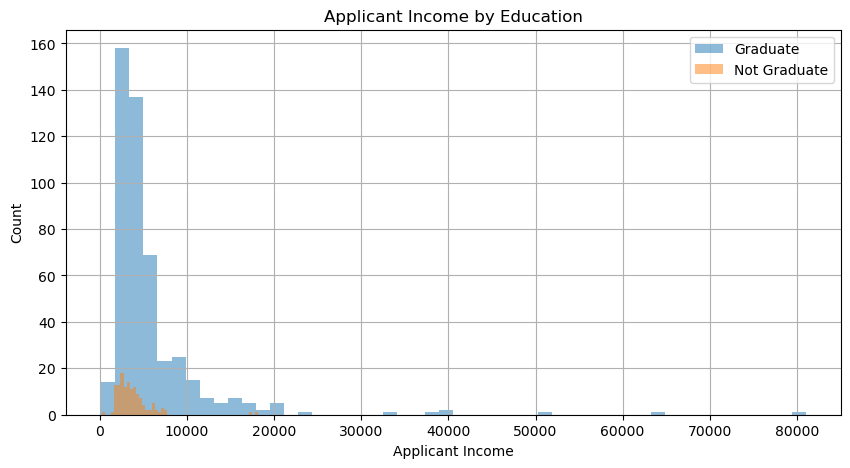

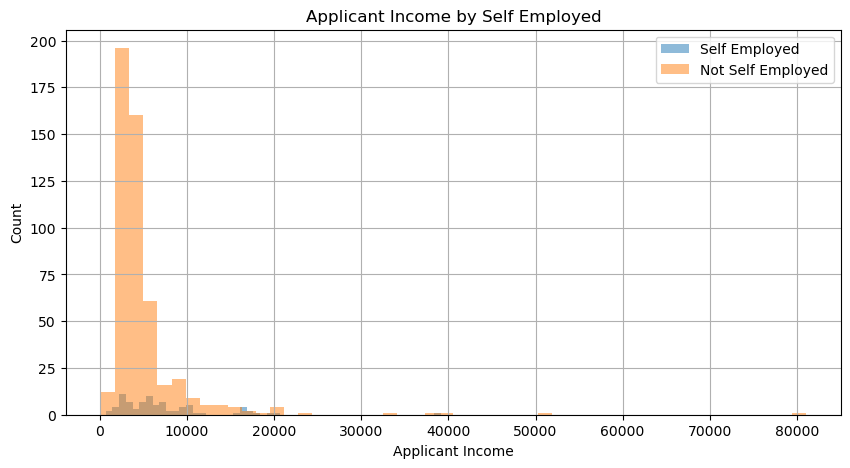

In [138]:
# Distribution of Applicant Income by Education
plt.figure(figsize=(10,5))
plt.title('Applicant Income by Education')

# Graduate
df.loc[df['Education'] == 'Graduate']['ApplicantIncome'].hist(bins=50, alpha=0.5, label='Graduate')

# Not Graduate
df.loc[df['Education'] == 'Not Graduate']['ApplicantIncome'].hist(bins=50, alpha=0.5, label='Not Graduate')

plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.legend()
plt.show()

# Distribution of Applicant Income by Self Employed
plt.figure(figsize=(10,5))
plt.title('Applicant Income by Self Employed')

# Self Employed
df.loc[df['Self_Employed'] == 'Yes']['ApplicantIncome'].hist(bins=50, alpha=0.5, label='Self Employed')

# Not Self Employed
df.loc[df['Self_Employed'] == 'No']['ApplicantIncome'].hist(bins=50, alpha=0.5, label='Not Self Employed')

plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.legend()
plt.show()

Look at the histogram and boxplot of LoanAmount

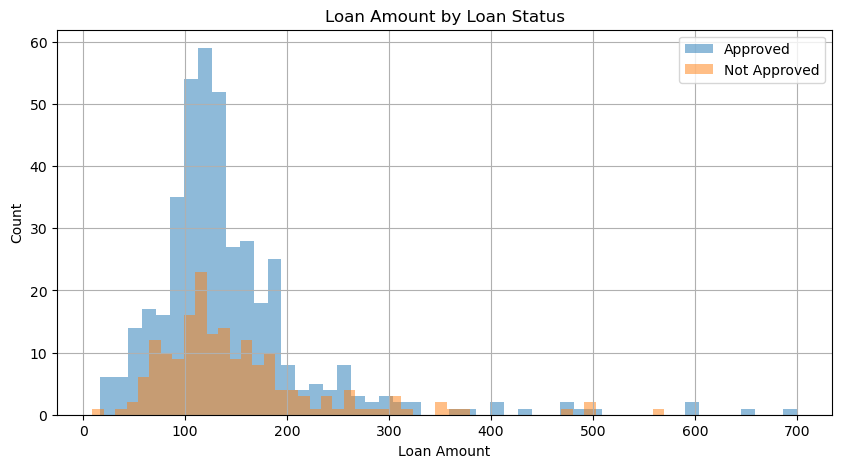

In [139]:
# histogram of Loan Amount by Loan Status
plt.figure(figsize=(10,5))
plt.title('Loan Amount by Loan Status')

# Approved
df.loc[df['Loan_Status'] == 'Y']['LoanAmount'].hist(bins=50, alpha=0.5, label='Approved')

# Not Approved
df.loc[df['Loan_Status'] == 'N']['LoanAmount'].hist(bins=50, alpha=0.5, label='Not Approved')

plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.legend()
plt.show()

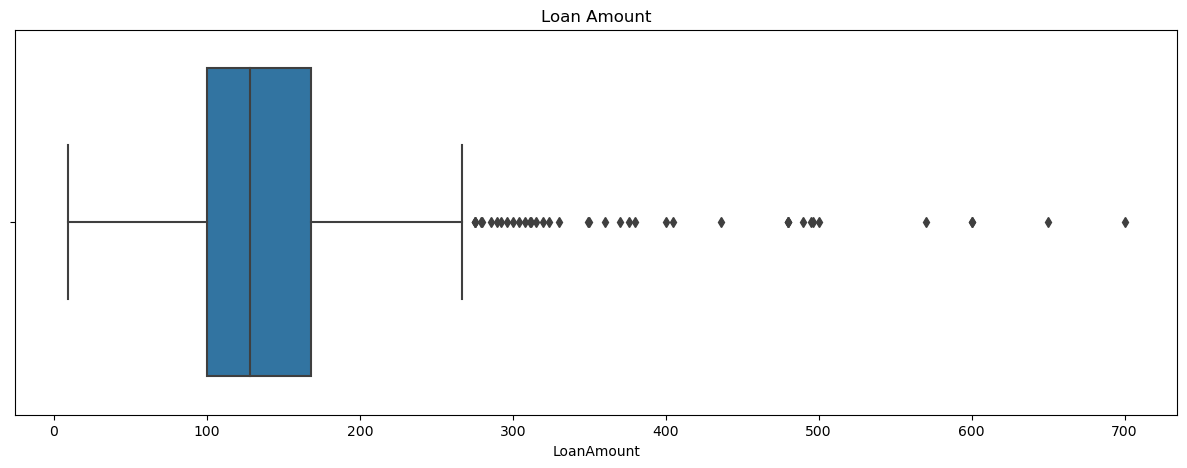

In [140]:
# box plot of Loan Amount
plt.figure(figsize=(15,5))
plt.title('Loan Amount')
sns.boxplot(x='LoanAmount', data=df)
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

Applicant Income vs Various Categorical Variables

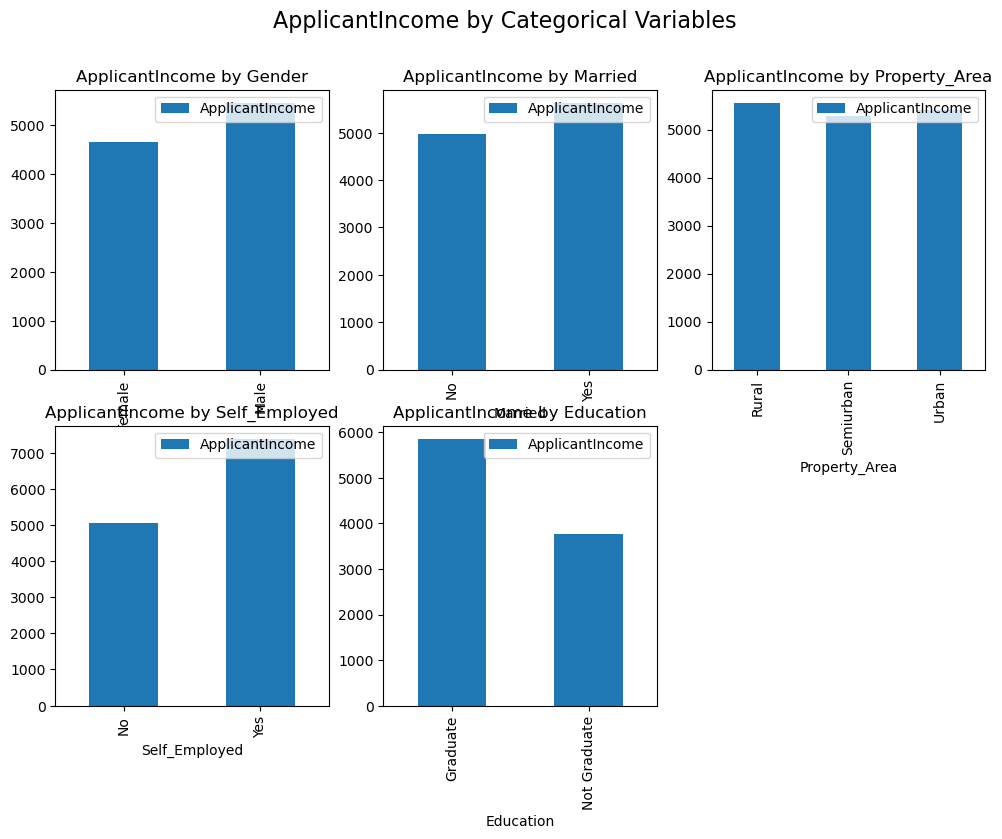

In [179]:
# Create a pivot table for Gender vs ApplicantIncome
pivot_gender = pd.pivot_table(df, values='ApplicantIncome', index=['Gender'], aggfunc='mean')

# Create a pivot table for Married vs ApplicantIncome
pivot_married = pd.pivot_table(df, values='ApplicantIncome', index=['Married'], aggfunc='mean')

# Create a pivot table for Property_Area vs ApplicantIncome
pivot_property = pd.pivot_table(df, values='ApplicantIncome', index=['Property_Area'], aggfunc='mean')

# Create a pivot table for Self_Employed vs ApplicantIncome
pivot_self_employed = pd.pivot_table(df, values='ApplicantIncome', index=['Self_Employed'], aggfunc='mean')

# Create a pivot table for Education vs ApplicantIncome
pivot_education = pd.pivot_table(df, values='ApplicantIncome', index=['Education'], aggfunc='mean')

# Create a 2x3 subplot grid for the charts
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot each pivot table on a subplot
pivot_gender.plot(kind='bar', title='ApplicantIncome by Gender', ax=axs[0, 0])
pivot_married.plot(kind='bar', title='ApplicantIncome by Married', ax=axs[0, 1])
pivot_property.plot(kind='bar', title='ApplicantIncome by Property_Area', ax=axs[0, 2])
pivot_self_employed.plot(kind='bar', title='ApplicantIncome by Self_Employed', ax=axs[1, 0])
pivot_education.plot(kind='bar', title='ApplicantIncome by Education', ax=axs[1, 1])

# Hide the remaining subplot
axs[1, 2].axis('off')

# Set the overall figure title
fig.suptitle('ApplicantIncome by Categorical Variables', fontsize=16)

plt.show()

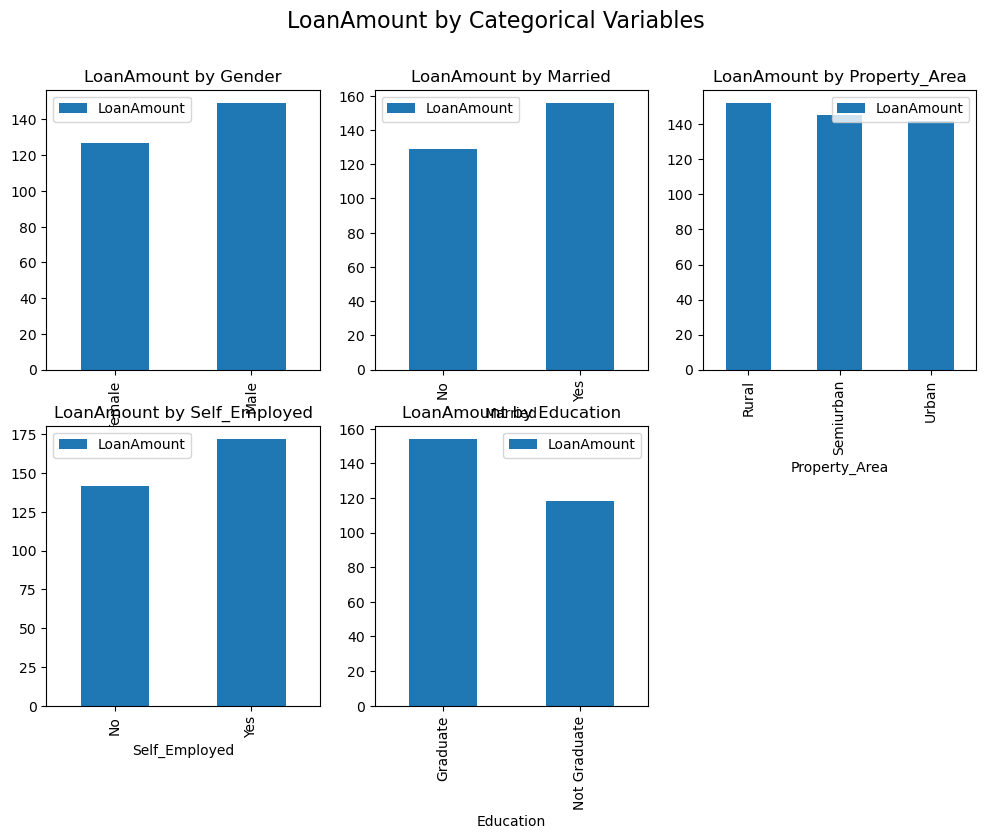

In [178]:
# Create a pivot table for Gender vs LoanAmount
pivot_gender = pd.pivot_table(df, values='LoanAmount', index=['Gender'], aggfunc='mean')

# Create a pivot table for Married vs LoanAmount
pivot_married = pd.pivot_table(df, values='LoanAmount', index=['Married'], aggfunc='mean')

# Create a pivot table for Property_Area vs LoanAmount
pivot_property = pd.pivot_table(df, values='LoanAmount', index=['Property_Area'], aggfunc='mean')

# Create a pivot table for Self_Employed vs LoanAmount
pivot_self_employed = pd.pivot_table(df, values='LoanAmount', index=['Self_Employed'], aggfunc='mean')

# Create a pivot table for Education vs LoanAmount
pivot_education = pd.pivot_table(df, values='LoanAmount', index=['Education'], aggfunc='mean')

# Create a 2x3 subplot grid for the charts
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot each pivot table on a subplot
pivot_gender.plot(kind='bar', title='LoanAmount by Gender', ax=axs[0, 0])
pivot_married.plot(kind='bar', title='LoanAmount by Married', ax=axs[0, 1])
pivot_property.plot(kind='bar', title='LoanAmount by Property_Area', ax=axs[0, 2])
pivot_self_employed.plot(kind='bar', title='LoanAmount by Self_Employed', ax=axs[1, 0])
pivot_education.plot(kind='bar', title='LoanAmount by Education', ax=axs[1, 1])

# Hide the remaining subplot
axs[1, 2].axis('off')

# Set the overall figure title
fig.suptitle('LoanAmount by Categorical Variables', fontsize=16)

plt.show()

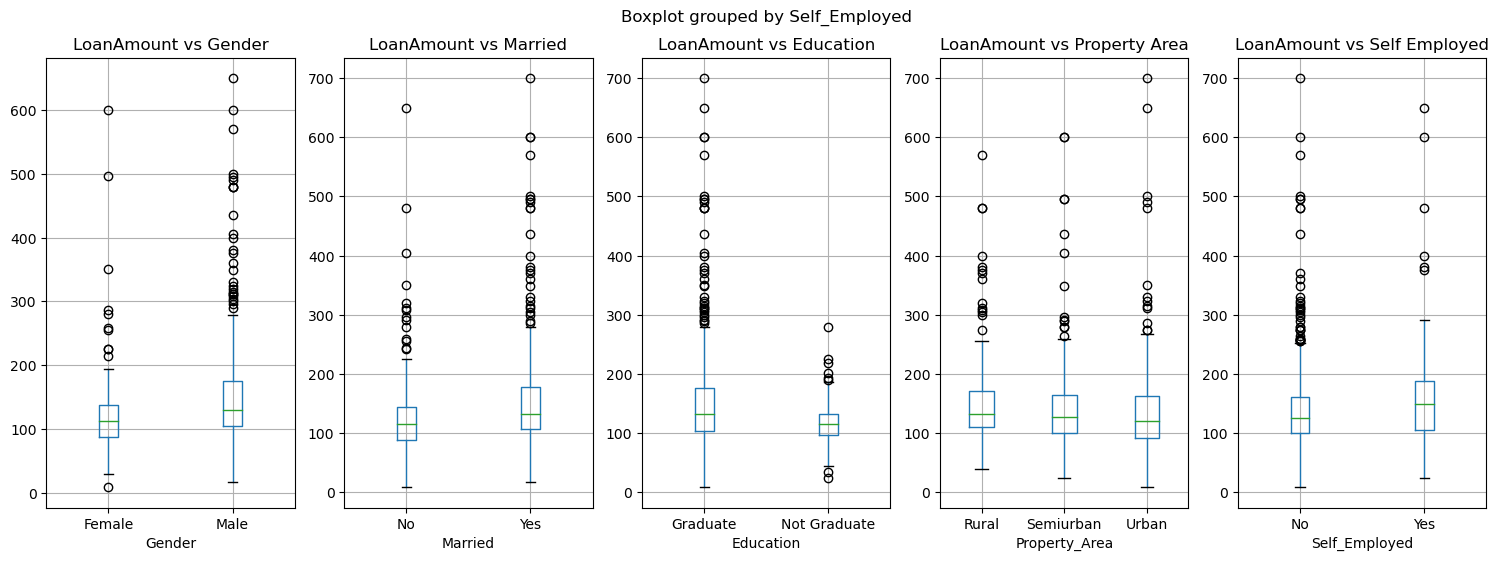

In [167]:
fig, axs = plt.subplots(1, 5, figsize=(18, 6))

# Subplot 1: LoanAmount vs Gender
df.boxplot(column='LoanAmount', by='Gender', ax=axs[0])
axs[0].set_title('LoanAmount vs Gender')

# Subplot 2: LoanAmount vs Married
df.boxplot(column='LoanAmount', by='Married', ax=axs[1])
axs[1].set_title('LoanAmount vs Married')

# Subplot 3: LoanAmount vs Education
df.boxplot(column='LoanAmount', by='Education', ax=axs[2])
axs[2].set_title('LoanAmount vs Education')

# Subplot 4: LoanAmount vs Property Area
df.boxplot(column='LoanAmount', by='Property_Area', ax=axs[3])
axs[3].set_title('LoanAmount vs Property Area')

# Subplot 5: LoanAmount vs Self Employed
df.boxplot(column='LoanAmount', by='Self_Employed', ax=axs[4])
axs[4].set_title('LoanAmount vs Self Employed')

plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [221]:
# missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [222]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [223]:
# fill missing loan amount with mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [224]:
# fill missing credit history with mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [225]:
# fill missing loan amount term with mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [226]:
# fill mising self employed with mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [227]:
# fill missing dependents with mode
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [228]:
# fill missing married with mode
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [229]:
# fill missing gender with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [230]:
# missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [231]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

c:\Users\Verma Ashiyaan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


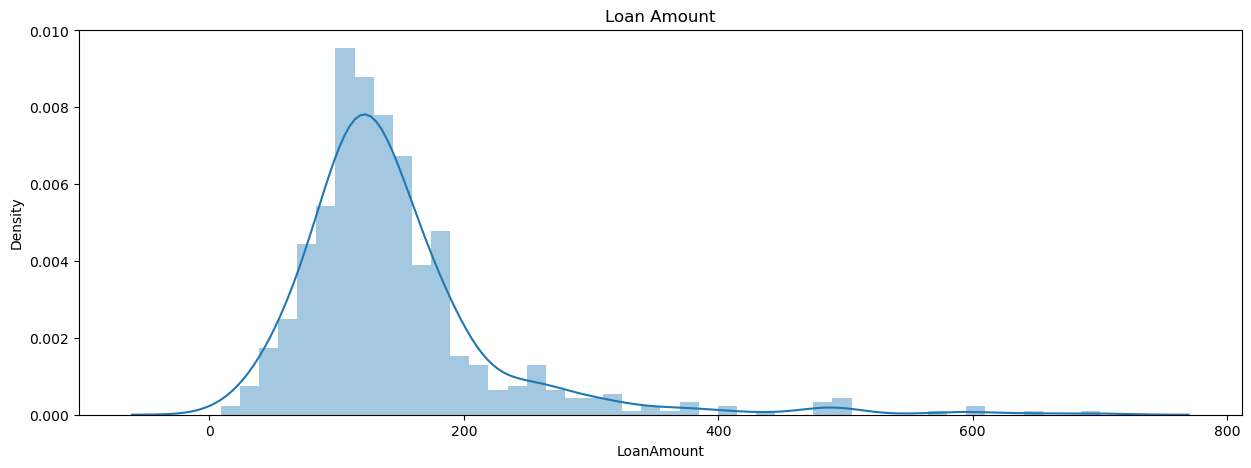

In [236]:
# histogram of Loan Amount
plt.figure(figsize=(15,5))
plt.title('Loan Amount')
sns.distplot(df['LoanAmount'])
plt.show()

In [237]:
# log transformation of loan amount to remove skewness towards right and make it normally distributed for better prediction
df['LoanAmount_log'] = np.log(df['LoanAmount'])

c:\Users\Verma Ashiyaan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


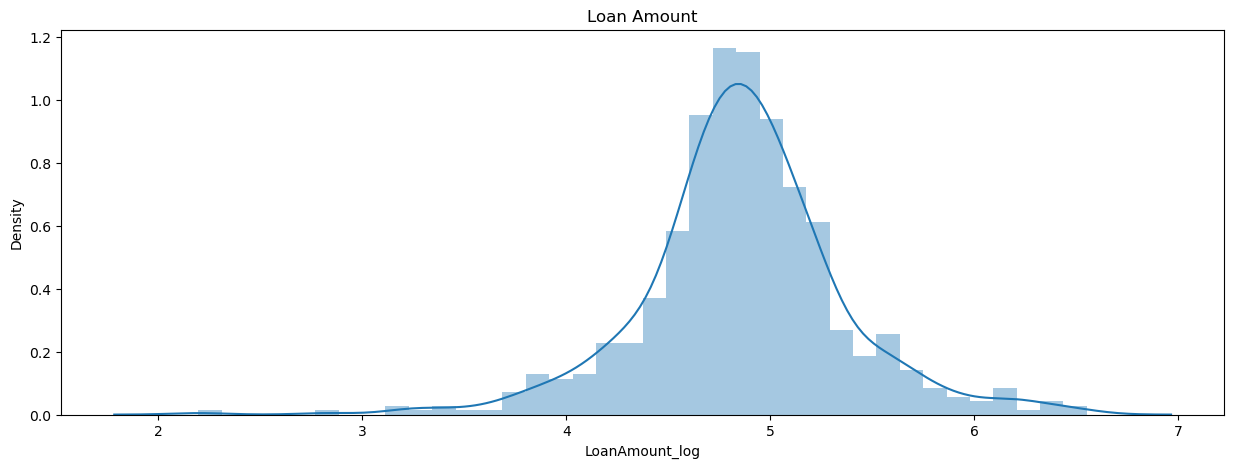

In [239]:
# histogram of Loan Amount
plt.figure(figsize=(15,5))
plt.title('Loan Amount')
sns.distplot(df['LoanAmount_log'])
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [240]:
# combine applicant income and coapplicant income to total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

c:\Users\Verma Ashiyaan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


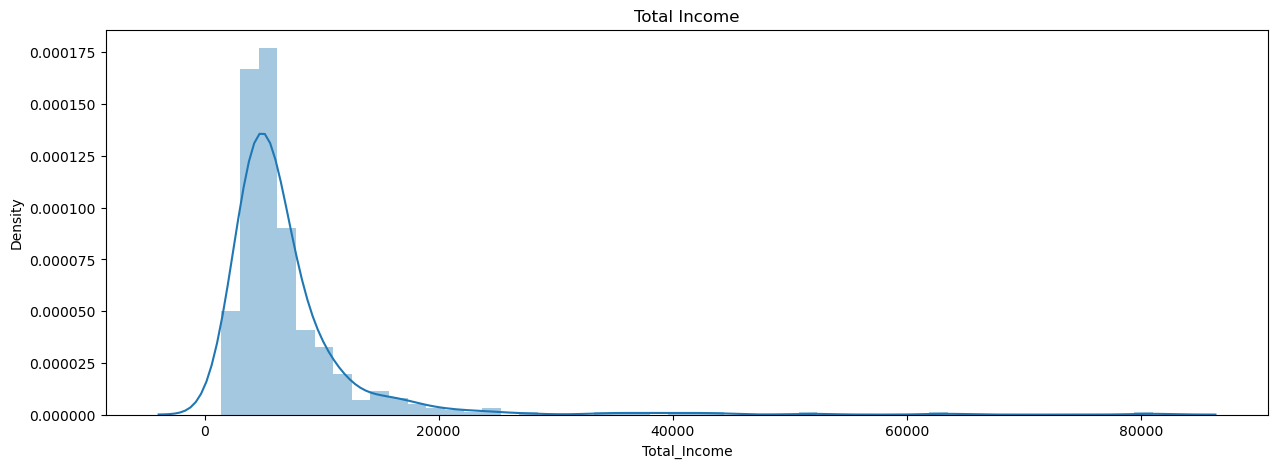

In [241]:
# histogram of Total Income
plt.figure(figsize=(15,5))
plt.title('Total Income')
sns.distplot(df['Total_Income'])
plt.show()

In [242]:
# log transformation of total income
df['Total_Income_log'] = np.log(df['Total_Income'])

c:\Users\Verma Ashiyaan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


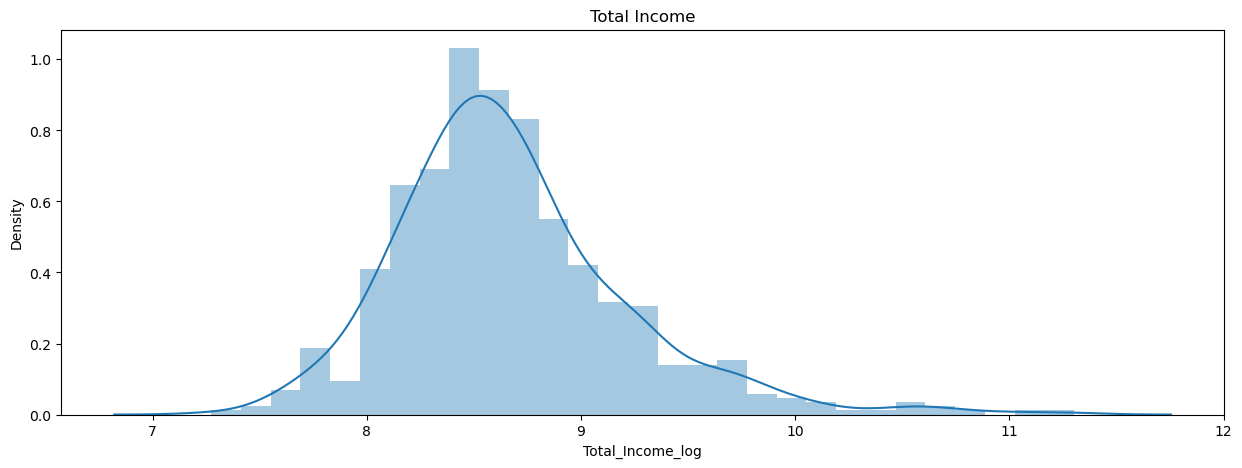

In [243]:
# histogram of Total Income log
plt.figure(figsize=(15,5))
plt.title('Total Income')
sns.distplot(df['Total_Income_log'])
plt.show()

In [259]:
# convert Gender to numeric 1 for male and 0 for female
df['Gender_x'] = df['Gender'].replace({'Female': 0, 'Male': 1})

In [ ]:
# convert Gender to numeric 1 for male and 0 for female
df['Gender_x'] = df['Gender'].replace({'Female': 0, 'Male': 1})

In [268]:
# data types of married
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [263]:
# convert Martial Status to numeric 1 for Married and 0 for Not Married
df['Married_x'] = df['Married'].replace({'No': 0, 'Yes': 1})

In [265]:
# convert Dependents 3+ to 3
df['Dependents_x'] = df['Dependents'].replace({'3+': 3})

In [267]:
# convert Education to numeric 1 for Graduate and 0 for Not Graduate
df['Education_x'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})

In [269]:
# convert property area to numeric 1 for Urban, 2 for Rural and 3 for Semiurban
df['Property_Area_x'] = df['Property_Area'].replace({'Urban': 1, 'Rural': 2, 'Semiurban': 3})

## 4. Building a Predictive Model

In [286]:
import pandas as pd
from sklearn.datasets import load_wine

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier
# train test split
from sklearn.model_selection import train_test_split

import pickle

In [287]:
X = df[['Gender_x','Married_x','Education_x','Dependents_x','Total_Income_log','LoanAmount_log',
         'Credit_History','Property_Area_x']]

y = df['Loan_Status']

test_size = 0.5
seed = 9

Split data into training and test set in the ratio of 80:20 (Training:Test).

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

Filter own columns

In [270]:
# own class that can be inserted to pipeline as any other sklearn object.
class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass


    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


# features we want to keep for PCA
feats = ['Gender_x','Married_x','Education_x','Dependents_x','Total_Income_log','LoanAmount_log',
         'Credit_History','Property_Area_x']
# creating class object with indexes we want to keep.
raw_feats = RawFeats(feats)

Scaling and PCA

In [271]:
sc = StandardScaler()
pca = PCA(n_components=2)

SelectKBest

In [272]:
selection = SelectKBest(k=4)

Random Forest

In [273]:
rf = RandomForestClassifier()

Combining everything into a pipeline

In [274]:
PCA_pipeline = Pipeline([
    ("rawFeats", raw_feats),
    ("scaler", sc),
    ("pca", pca)
])

kbest_pipeline = Pipeline([("kBest", selection)])

Combining with `FeatureUnion`

In [275]:
all_features = FeatureUnion([
    ("pcaPipeline", PCA_pipeline), 
    ("kBestPipeline", kbest_pipeline)
])

**main** pipeline which ends with Regressor

In [276]:
main_pipeline = Pipeline([
    ("features", all_features),
    ("rf", rf)
])

Try paramater grid search to improve the results

In [289]:
# set up our parameters grid
param_grid = {"features__pcaPipeline__pca__n_components": [1, 2, 3],
                  "features__kBestPipeline__kBest__k": [1, 2, 3],
                  "rf__n_estimators":[2, 5, 10],
                  "rf__max_depth":[2, 4, 6]
             }

# create a Grid Search object
grid_search = GridSearchCV(main_pipeline, param_grid, n_jobs = -1, verbose=10, refit=True)    

# fit the model and tune parameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('pcaPipeline',
                                                                        Pipeline(steps=[('rawFeats',
                                                                                         <__main__.RawFeats object at 0x0000011F0087C4F0>),
                                                                                        ('scaler',
                                                                                         StandardScaler()),
                                                                                        ('pca',
                                                                                         PCA(n_components=2))])),
                                                                       ('kBestPipeline',
                                                                        Pipeline(steps=[('kBest',
                

In [290]:
print(grid_search.best_params_)

{'features__kBestPipeline__kBest__k': 2, 'features__pcaPipeline__pca__n_components': 1, 'rf__max_depth': 2, 'rf__n_estimators': 10}


In [291]:
pickle.dump( grid_search, open( "../data/model.p", "wb" ) )

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [292]:
loaded_model = pickle.load(open("../data/model.p", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7980456026058632


In [293]:
y_pred = loaded_model.predict(X_test)
# print the first 5 predictions
print(y_pred[:5])

['Y' 'Y' 'Y' 'Y' 'N']


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [309]:
json_data = X_test.to_json(orient='records')
json_data

'[{"Gender_x":1,"Married_x":0,"Education_x":0,"Dependents_x":"0","Total_Income_log":8.1942293048,"LoanAmount_log":3.2188758249,"Credit_History":1.0,"Property_Area_x":3},{"Gender_x":1,"Married_x":0,"Education_x":1,"Dependents_x":"0","Total_Income_log":7.9076515947,"LoanAmount_log":4.248495242,"Credit_History":1.0,"Property_Area_x":3},{"Gender_x":1,"Married_x":1,"Education_x":1,"Dependents_x":"0","Total_Income_log":10.6896012596,"LoanAmount_log":4.7874917428,"Credit_History":1.0,"Property_Area_x":3},{"Gender_x":1,"Married_x":0,"Education_x":0,"Dependents_x":"0","Total_Income_log":7.9211727216,"LoanAmount_log":4.1743872699,"Credit_History":1.0,"Property_Area_x":2},{"Gender_x":1,"Married_x":1,"Education_x":1,"Dependents_x":"1","Total_Income_log":9.0240107938,"LoanAmount_log":5.0238805208,"Credit_History":0.0,"Property_Area_x":3},{"Gender_x":1,"Married_x":1,"Education_x":0,"Dependents_x":3,"Total_Income_log":8.5032970862,"LoanAmount_log":4.8520302639,"Credit_History":1.0,"Property_Area_x":3

In [313]:
json_data = {"Gender_x":1,"Married_x":0,"Education_x":1,"Dependents_x":"1","Total_Income_log":8.5269454829,"LoanAmount_log":4.7095302013,"Credit_History":0.0,"Property_Area_x":1}

In [314]:
import requests
URL = "http://ec2-3-26-192-78.ap-southeast-2.compute.amazonaws.com:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [315]:
print(r.json())

[[0.7070923205254624, 0.29290767947453755]]


In [320]:
# append y_pred to X_test
predDF = X_test
predDF['Loan_Status'] = y_pred

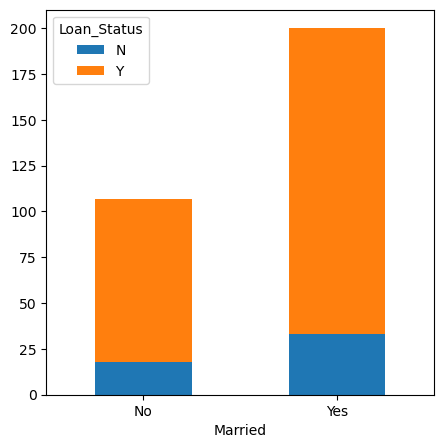

In [327]:
# show married and unmarried applicants with loan status
predDF.groupby(['Married_x','Loan_Status']).size().unstack().plot(kind='bar',stacked=True, figsize=(5,5))
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.xlabel('Married')
plt.show()

In [328]:
# print married and unmarried applicants with loan status
print(predDF.groupby(['Married_x','Loan_Status']).size().unstack())

Loan_Status   N    Y
Married_x           
0            18   89
1            33  167


In [330]:
print(f"Married people Approval ratio: {167/(167+33)}")
print(f"Unmarried people Approval ratio: {89/(89+18)}")

Married people Approval ratio: 0.835
Unmarried people Approval ratio: 0.8317757009345794
